# Project: Customer Segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the dataset
data = pd.read_excel("D:\Data Analyst\Python\Project\CustomerSegment\data_RFM.xlsx")

In [3]:
#Overview Dataset
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Count values of dataset
data.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [5]:
#Eliminate missing values in column 'CustomerID' as they cannot be replaced by mean or median
data_not_nan = data[data['CustomerID'].notna()]
data_not_nan.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
#Check again
data_not_nan.count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64

In [7]:
#Overview about datatype of dataset
data_not_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


### Tính toán RFM
* Recency (Thời gian gần nhất mua hàng)
* Frequency (Tần suất)
* Monetary (Giá trị tiền mỗi lần mua hàng)

In [8]:
#Calculated RFM

#Convert Datatype in columns InvoiceDate to 'date'
data_not_nan['InvoiceDate'] = pd.to_datetime(data_not_nan['InvoiceDate'], format='%Y-%m-%d %H:%M:%S') #format is type you want to convert

#Get the largest date in 'InvoiceDate' + 1
import datetime
current_date = max(data_not_nan['InvoiceDate']) + datetime.timedelta(days=1);

C:\Users\admin88\AppData\Local\Temp\ipykernel_17988\1872866594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not_nan['InvoiceDate'] = pd.to_datetime(data_not_nan['InvoiceDate'], format='%Y-%m-%d %H:%M:%S') #format is type you want to convert


In [9]:
#Calculator Monetary
data_not_nan['TotalPay'] = data_not_nan['Quantity'] * data_not_nan['UnitPrice']

C:\Users\admin88\AppData\Local\Temp\ipykernel_17988\3351114995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not_nan['TotalPay'] = data_not_nan['Quantity'] * data_not_nan['UnitPrice']


In [10]:
#Groupby by CustomerID to calculate R,F,M and create a Dataframe with 3 columns, calculated RFM.
data_groupby_customerid = data_not_nan.groupby(['CustomerID']).agg(
    {
        'InvoiceDate': lambda x: (current_date - x.max()).days, #Calculate Recency
        'InvoiceNo': 'count',
        'TotalPay': 'sum'
    }
)

In [11]:
#Check outcomes
data_groupby_customerid

,InvoiceDate,InvoiceNo,TotalPay
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [12]:
#Replace name of columns and assign(gán)right away
data_groupby_customerid.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPay': 'MonetaryValue'}, inplace=True)

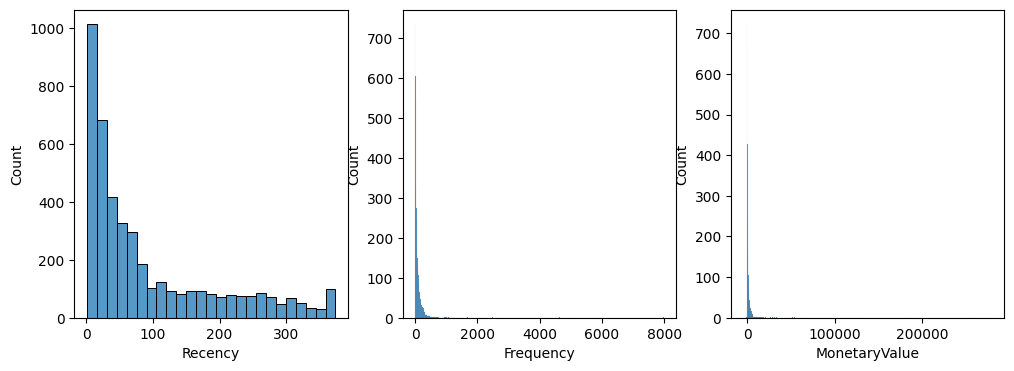

In [13]:
#Visualization about distribution of data using OOI API
fig, ax = plt.subplots(1, 3, figsize=(12, 4)) 
sns.histplot(data_groupby_customerid['Recency'], ax = ax[0]);
sns.histplot(data_groupby_customerid['Frequency'], ax = ax[1]);
sns.histplot(data_groupby_customerid['MonetaryValue'], ax = ax[2]);
plt.show()

Nhận thấy sự phân bố của dữ liệu chưa tốt, chưa phù hợp để làm dữ liệu đầu vào training cho model. Có thể chuyển đổi chúng tạo sự cân bằng,
đưa dữ liệu gần với phân phối chuẩn để model dự báo chính xác nhất.

In [14]:
#Analyze which method produces the most balanced value results and show on histplot
from scipy import stats

def analyze_skewness (x):
    fig, ax = plt.subplots(2, 2, figsize = (5, 5))
    sns.histplot(data_groupby_customerid[x], ax=ax[0, 0], kde=True)
    sns.histplot(np.log(data_groupby_customerid[x]), ax=ax[0, 1], kde=True)
    sns.histplot(np.sqrt(data_groupby_customerid[x]), ax=ax[1, 0], kde=True)
    sns.histplot(stats.boxcox(data_groupby_customerid[x])[0], ax=ax[1, 1], kde=True)
    plt.tight_layout()

    print(data_groupby_customerid[x].skew().round(2)) #Calculate the skewness and round
    print(np.log(data_groupby_customerid[x]).skew().round(2))
    print(np.sqrt(data_groupby_customerid[x]).skew().round(2))
    print(pd.Series(stats.boxcox(data_groupby_customerid[x])[0]).skew().round(2))


1.25
-0.53
0.59
-0.07


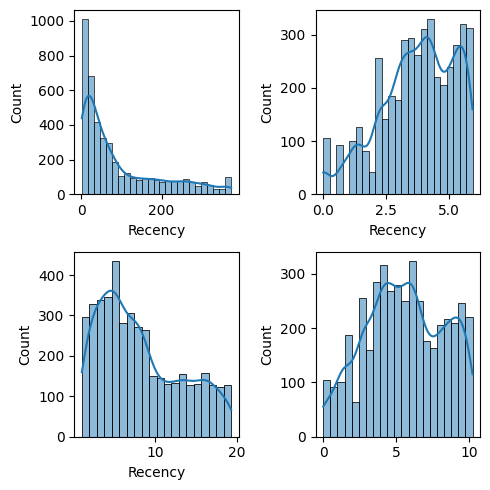

In [15]:
analyze_skewness('Recency')

* Ở bốn biểu đồ trên nhận thấy: phép biến đổi stats.boxcox sẽ cho tập dữ liệu cân bằng nhất, cụ thể ở giá trị '-0.07'

In [16]:
#Transform data
data_transform = pd.DataFrame() #Create to save transform
data_transform['Recency'] = stats.boxcox(data_groupby_customerid['Recency'])[0] #Using Box cox transform
data_transform['Frequency'] = stats.boxcox(data_groupby_customerid['Frequency'])[0]
data_transform['MonetaryValue'] = pd.Series(np.cbrt(data_groupby_customerid['MonetaryValue'])).values #So Monetary has positive values we going to using cbrt(căn bậc 3)
data_transform.head(5)

,Recency,Frequency,MonetaryValue
0,9.876618,0.707055,0.000000
1,0.735846,6.060363,16.273929
2,6.384920,3.794006,12.158183
3,3.826255,4.862047,12.068017
4,9.741979,3.075409,6.941001


In [17]:
#Convert data to the same scale using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fit and transform, with outcome is an array 
data_transform = scaler.fit_transform(data_transform)
data_transform

array([[ 1.61117306, -2.0980717 , -1.92564704],
       [-1.7975922 ,  1.15134635,  1.33054192],
       [ 0.30905347, -0.22431569,  0.50703791],
       ...,
       [-1.14097186, -0.85048402, -0.80307538],
       [-1.48869338,  2.36366088,  0.63453134],
       [-0.10466244,  0.39146901,  0.52497099]])

In [18]:
#Check again
pd.DataFrame(data_transform).head()

,0,1,2
0,1.611173,-2.098072,-1.925647
1,-1.797592,1.151346,1.330542
2,0.309053,-0.224316,0.507038
3,-0.645121,0.423978,0.488997
4,1.560964,-0.660498,-0.536848


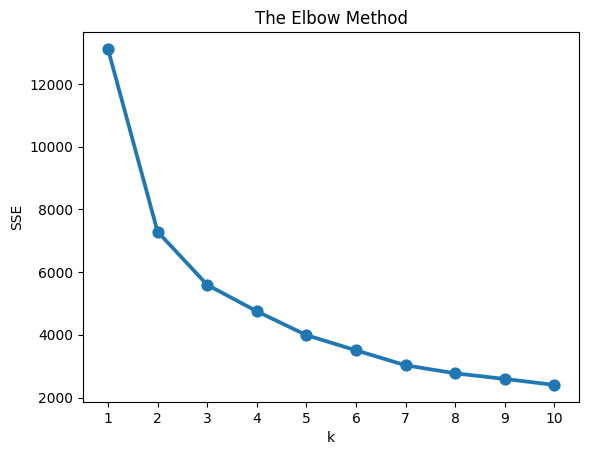

In [19]:
#Use KNC and select cluster 
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
  # 1.  Huấn luyện với số cụm = k
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data_transform)
  sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


Nhận thấy với giá trị K bằng 3 thì sự mất mát dữ liệu không lớn và việc phân khúc khách hàng nên dừng lại ở 3 phân khúc (thấp, trung bình, cao)
có thể sẽ hợp lý tùy vào từng điều kiện.

Ví dụ trong mô hình phân loại khách hàng, tùy vào số phân khúc mà người quản lý hướng tới để chia khách hàng ra 3 hay 4 loại cũng là một lý do hợp lý. Ở đây đang tính toán theo RFM thì em nghĩ 3 hoặc 4 cluster để phân loại cũng là rất hợp lý, nếu không muốn mô hình phân loại quá chi tiết.

In [20]:
#Using Kmeans with cluster = 3
Model = KMeans(n_clusters=3, random_state=42)
Model.fit(data_transform)


KMeans(n_clusters=3, random_state=42)

In [21]:
#Insert columns
data_groupby_customerid['Cluster'] = Model.labels_
data_groupby_customerid

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,326,2,0.00,0
12347.0,2,182,4310.00,2
12348.0,75,31,1797.24,1
12349.0,19,73,1757.55,1
12350.0,310,17,334.40,0
...,...,...,...,...
18280.0,278,10,180.60,0
18281.0,181,7,80.82,0
18282.0,8,13,176.60,1


In [22]:
#Calculator mean of columns
data_groupby_customerid = data_groupby_customerid.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
})
data_groupby_customerid

,Recency,Frequency,MonetaryValue
Cluster,,,
0,184.949153,19.058717,350.251702
1,42.841997,67.671127,1012.634582
2,17.570142,313.846847,7405.278005


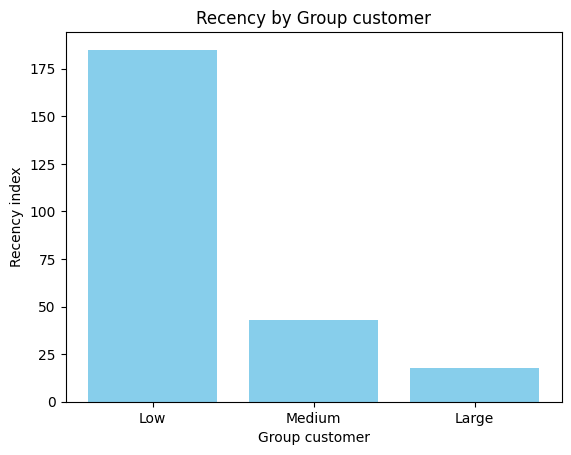

In [23]:
recency_data = [184.949153, 42.841997, 17.570142]

#Distribution 
groups = ['Low', 'Medium', 'Large']

#Visualization
plt.bar(groups, recency_data, color='skyblue')

#Title and labels X, Y
plt.title('Recency by Group customer')
plt.xlabel('Group customer')
plt.ylabel('Recency index')

#Show
plt.show()

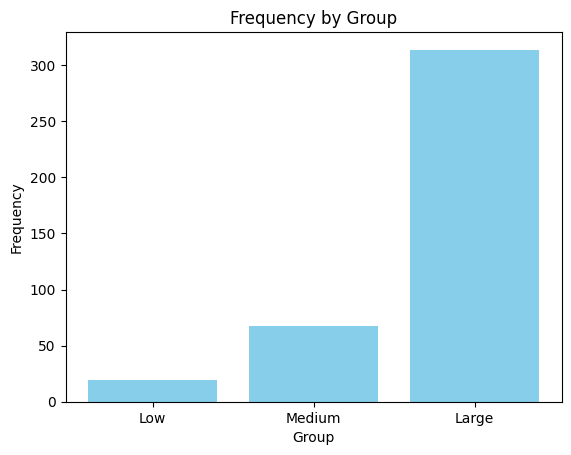

In [24]:
frequency_data = [19.058717, 67.671127, 313.846847]

#Distribution
groups = ['Low', 'Medium', 'Large']

#Visualizaton
plt.bar(groups, frequency_data, color='skyblue')

plt.title('Frequency by Group')
plt.xlabel('Group')
plt.ylabel('Frequency')

plt.show()

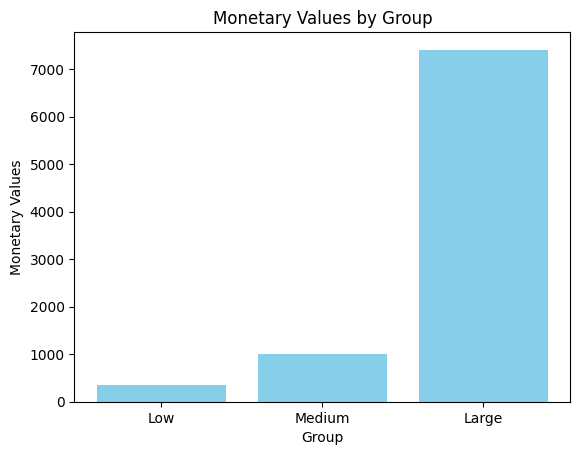

In [25]:
monetaryValues_data = [350.251702, 1012.634582, 7405.278005]

groups = ['Low', 'Medium', 'Large']

plt.bar(groups, monetaryValues_data, color='skyblue')

plt.title('Monetary Values by Group')
plt.xlabel('Group')
plt.ylabel('Monetary Values')

plt.show()